# Data Mining Project (2)

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics as met
from sklearn.naive_bayes import CategoricalNB, GaussianNB
import random
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

## Import And Read Data

In [589]:
data = pd.read_csv('heart_disease.csv')

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [590]:
data.shape

(10000, 18)

## Data Types, Missing data And Drop Columns

In [591]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      10000 non-null  object 
 1   BMI               10000 non-null  float64
 2   Smoking           10000 non-null  object 
 3   AlcoholDrinking   10000 non-null  object 
 4   Stroke            10000 non-null  object 
 5   PhysicalHealth    10000 non-null  int64  
 6   MentalHealth      10000 non-null  int64  
 7   DiffWalking       10000 non-null  object 
 8   Sex               10000 non-null  object 
 9   AgeCategory       10000 non-null  object 
 10  Race              10000 non-null  object 
 11  Diabetic          10000 non-null  object 
 12  PhysicalActivity  10000 non-null  object 
 13  GenHealth         10000 non-null  object 
 14  SleepTime         10000 non-null  int64  
 15  Asthma            10000 non-null  object 
 16  KidneyDisease     10000 non-null  object 

In [592]:
data = data.drop(['PhysicalHealth', 'MentalHealth', 'SkinCancer', 'KidneyDisease', 'Asthma', 'Stroke', 'Race', 'DiffWalking', 'GenHealth'], axis=1)

data.shape

(10000, 9)

In [593]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,No,16.60,Yes,No,Female,55-59,Yes,Yes,5
1,No,20.34,No,No,Female,80 or older,No,Yes,7
2,No,26.58,Yes,No,Male,65-69,Yes,Yes,8
3,No,24.21,No,No,Female,75-79,No,No,6
4,No,23.71,No,No,Female,40-44,No,Yes,8


In [594]:
# Missing Values
data.isnull().sum().sort_values(ascending = False)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
SleepTime           0
dtype: int64

In [595]:
data = pd.get_dummies(data, columns=['Smoking'])
data = pd.get_dummies(data, columns=['AlcoholDrinking'])
data = pd.get_dummies(data, columns=['Sex'])
data = pd.get_dummies(data, columns=['Diabetic'])
data = pd.get_dummies(data, columns=['PhysicalActivity'])

In [596]:
data.head()

,HeartDisease,BMI,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Sex_Female,Sex_Male,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes
0,No,16.60,55-59,5,0,1,1,0,1,0,0,0,1,0,0,1
1,No,20.34,80 or older,7,1,0,1,0,1,0,1,0,0,0,0,1
2,No,26.58,65-69,8,0,1,1,0,0,1,0,0,1,0,0,1
3,No,24.21,75-79,6,1,0,1,0,1,0,1,0,0,0,1,0
4,No,23.71,40-44,8,1,0,1,0,1,0,1,0,0,0,0,1


In [597]:
data['AgeCategory'].value_counts()

65-69          1232
70-74          1105
60-64          1100
80 or older     891
55-59           871
75-79           806
50-54           770
45-49           623
40-44           589
35-39           572
30-34           536
18-24           484
25-29           421
Name: AgeCategory, dtype: int64

In [598]:
data['AgeCategory'] = data['AgeCategory'].astype('category').cat.codes

In [599]:
data = data.replace({'HeartDisease': {'No': 0, 'Yes': 1}})

In [600]:
data.head()

,HeartDisease,BMI,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Sex_Female,Sex_Male,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes
0,0,16.60,7,5,0,1,1,0,1,0,0,0,1,0,0,1
1,0,20.34,12,7,1,0,1,0,1,0,1,0,0,0,0,1
2,0,26.58,9,8,0,1,1,0,0,1,0,0,1,0,0,1
3,0,24.21,11,6,1,0,1,0,1,0,1,0,0,0,1,0
4,0,23.71,4,8,1,0,1,0,1,0,1,0,0,0,0,1


In [601]:
# Normalization

N = len(data)
def normalize(X):
    Max = max(X)
    Min = min(X)
    for i in range(0, N):
        X[i] = (X[i] - Min) / (Max - Min)
        
B = normalize(data['BMI'])

<ipython-input-601-d9565333ed82>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = (X[i] - Min) / (Max - Min)


In [602]:
data.head()

,HeartDisease,BMI,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Sex_Female,Sex_Male,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes
0,0,0.058423,7,5,0,1,1,0,1,0,0,0,1,0,0,1
1,0,0.111458,12,7,1,0,1,0,1,0,1,0,0,0,0,1
2,0,0.199943,9,8,0,1,1,0,0,1,0,0,1,0,0,1
3,0,0.166336,11,6,1,0,1,0,1,0,1,0,0,0,1,0
4,0,0.159246,4,8,1,0,1,0,1,0,1,0,0,0,0,1


## Dataset Preparation and Splitting 

In [603]:
X = data.drop('HeartDisease', axis=1)
Y = data['HeartDisease'] #Target

num_of_rows = int(len(data) * 0.8)

X_train = X[:num_of_rows]
X_test = X[num_of_rows:]

Y_train = Y[:num_of_rows]
Y_test = Y[num_of_rows:]
x = Y[num_of_rows:]

## Cross Validation

## Modeling

## KNN

In [604]:
model = KNeighborsClassifier(n_neighbors = 10, metric= 'euclidean')
model.fit(X_train,Y_train)
pred_values = model.predict(X_test)
acc1 = accuracy_score(pred_values , Y_test)
acc1

0.882

In [605]:
def Knn_Kfold(k, distance):
    kf = KFold(n_splits=5, random_state=None)
    model = KNeighborsClassifier(n_neighbors = k, metric= distance)

    acc_score = []
 
    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        Y_train , Y_test = Y[train_index] , Y[test_index]
     
        model.fit(X_train,Y_train)
        pred_values = model.predict(X_test)
     
        acc = accuracy_score(pred_values , Y_test)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/5
    
    return acc_score, avg_acc_score

In [606]:
def Knn_SKf(k, distance):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
    model = KNeighborsClassifier(n_neighbors = k, metric=distance)
    acc_stratified = []
    for train_index, test_index in skf.split(X, Y): 
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        Y_train , Y_test = Y[train_index] , Y[test_index] 
    
        model.fit(X_train, Y_train) 
        acc_stratified.append(model.score(X_test, Y_test))
    
    avg_acc_score = sum(acc_stratified)/10

    return acc_stratified, avg_acc_score

### k = 10

In [607]:
k10_1 = Knn_Kfold(10, 'euclidean')
k10_1

([0.872, 0.899, 0.917, 0.9195, 0.882], 0.8978999999999999)

In [608]:
k10_2 = Knn_Kfold(10, 'manhattan')
k10_2

([0.8715, 0.9005, 0.9165, 0.92, 0.882], 0.8981)

In [609]:
k10_3 = Knn_Kfold(10, 'minkowski')
k10_3

([0.872, 0.899, 0.917, 0.9195, 0.882], 0.8978999999999999)

In [610]:
sk10_1 = Knn_SKf(10, 'euclidean')
sk10_1

([0.895, 0.901, 0.901, 0.902, 0.895, 0.897, 0.902, 0.905, 0.897, 0.898],
 0.8993)

In [611]:
sk10_2 = Knn_SKf(10, 'manhattan')
sk10_2

([0.895, 0.901, 0.901, 0.902, 0.894, 0.9, 0.902, 0.906, 0.898, 0.898],
 0.8996999999999999)

In [612]:
sk10_3 = Knn_SKf(10, 'minkowski')
sk10_3

([0.895, 0.901, 0.901, 0.902, 0.895, 0.897, 0.902, 0.905, 0.897, 0.898],
 0.8993)

### k = 20

In [613]:
k20_1 = Knn_Kfold(20, 'euclidean')
k20_1

([0.8735, 0.9015, 0.921, 0.926, 0.8865], 0.9017)

In [614]:
k20_2 = Knn_Kfold(20, 'manhattan')
k20_2

([0.8735, 0.901, 0.9195, 0.927, 0.8875], 0.9017)

In [615]:
k20_3 = Knn_Kfold(20, 'minkowski')
k20_3

([0.8735, 0.9015, 0.921, 0.926, 0.8865], 0.9017)

In [616]:
sk20_1 = Knn_SKf(20, 'euclidean')
sk20_1

([0.897, 0.901, 0.899, 0.898, 0.902, 0.903, 0.903, 0.905, 0.9, 0.899],
 0.9007000000000002)

In [617]:
sk20_2 = Knn_SKf(20, 'manhattan')
sk20_2

([0.897, 0.901, 0.899, 0.901, 0.902, 0.904, 0.904, 0.906, 0.902, 0.9], 0.9016)

In [618]:
sk20_3 = Knn_SKf(20, 'minkowski')
sk20_3

([0.897, 0.901, 0.899, 0.898, 0.902, 0.903, 0.903, 0.905, 0.9, 0.899],
 0.9007000000000002)

### k = 30

In [619]:
k30_1 = Knn_Kfold(30, 'euclidean')
k30_1

([0.873, 0.9, 0.92, 0.926, 0.891], 0.9019999999999999)

In [620]:
k30_2 = Knn_Kfold(30, 'manhattan')
k30_2

([0.874, 0.901, 0.9195, 0.9265, 0.889], 0.9019999999999999)

In [621]:
k30_3 = Knn_Kfold(30, 'minkowski')
k30_3

([0.873, 0.9, 0.92, 0.926, 0.891], 0.9019999999999999)

In [622]:
sk30_1 = Knn_SKf(30, 'euclidean')
sk30_1

([0.9, 0.899, 0.902, 0.902, 0.902, 0.903, 0.901, 0.901, 0.898, 0.9],
 0.9007999999999999)

In [623]:
sk30_2 = Knn_SKf(30, 'manhattan')
sk30_2

([0.9, 0.901, 0.9, 0.902, 0.9, 0.906, 0.901, 0.903, 0.899, 0.9],
 0.9011999999999999)

In [624]:
sk30_3 = Knn_SKf(30, 'minkowski')
sk30_3

([0.9, 0.899, 0.902, 0.902, 0.902, 0.903, 0.901, 0.901, 0.898, 0.9],
 0.9007999999999999)

### k = 40

In [625]:
k40_1 = Knn_Kfold(40, 'euclidean')
k40_1

([0.873, 0.9005, 0.92, 0.9245, 0.889], 0.9014)

In [626]:
k40_2 = Knn_Kfold(40, 'manhattan')
k40_2

([0.8745, 0.9, 0.919, 0.9255, 0.89], 0.9018)

In [627]:
k40_3 = Knn_Kfold(40, 'minkowski')
k40_3

([0.873, 0.9005, 0.92, 0.9245, 0.889], 0.9014)

In [628]:
sk40_1 = Knn_SKf(40, 'euclidean')
sk40_1

([0.902, 0.902, 0.903, 0.902, 0.901, 0.903, 0.901, 0.9, 0.899, 0.9], 0.9013)

In [629]:
sk40_2 = Knn_SKf(40, 'manhattan')
sk40_2

([0.902, 0.901, 0.902, 0.901, 0.901, 0.905, 0.901, 0.904, 0.899, 0.899],
 0.9015000000000001)

In [630]:
sk40_3 = Knn_SKf(40, 'minkowski')
sk40_3

([0.902, 0.902, 0.903, 0.902, 0.901, 0.903, 0.901, 0.9, 0.899, 0.9], 0.9013)

### k = 50

In [631]:
k50_1 = Knn_Kfold(50, 'euclidean')
k50_1

([0.873, 0.901, 0.9195, 0.925, 0.8885], 0.9014)

In [632]:
k50_2 = Knn_Kfold(50, 'manhattan')
k50_2

([0.874, 0.9005, 0.919, 0.9255, 0.8885], 0.9015000000000001)

In [633]:
k50_3 = Knn_Kfold(50, 'minkowski')
k50_3

([0.873, 0.901, 0.9195, 0.925, 0.8885], 0.9014)

In [634]:
sk50_1 = Knn_SKf(50, 'euclidean')
sk50_1

([0.902, 0.902, 0.902, 0.902, 0.901, 0.903, 0.901, 0.901, 0.9, 0.9],
 0.9014000000000001)

In [635]:
sk50_2 = Knn_SKf(50, 'manhattan')
sk50_2

([0.904, 0.901, 0.902, 0.902, 0.9, 0.904, 0.901, 0.902, 0.9, 0.9], 0.9016)

In [636]:
sk50_3 = Knn_SKf(50, 'minkowski')
sk50_3

([0.902, 0.902, 0.902, 0.902, 0.901, 0.903, 0.901, 0.901, 0.9, 0.9],
 0.9014000000000001)

Text(0, 0.5, 'Accuracy')

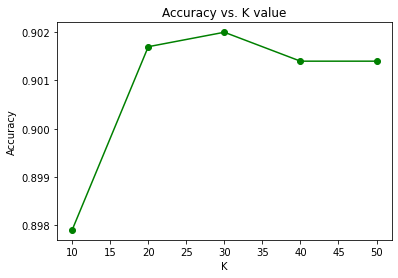

In [637]:
accuracy = [k10_1[1], k20_1[1], k30_1[1], k40_1[1], k50_1[1]]
k = [10, 20, 30, 40, 50]
plt.plot(k, accuracy, color = 'green', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. K value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

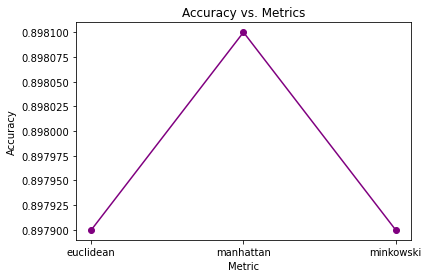

In [638]:
accuracy = [k10_1[1], k10_2[1], k10_3[1]]
Metric = ['euclidean', 'manhattan', 'minkowski']
plt.plot(Metric, accuracy, color = 'purple', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. Metrics')
plt.xlabel('Metric')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

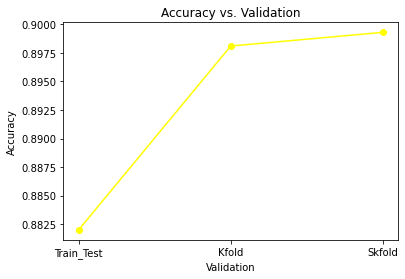

In [639]:
accuracy = [acc1, k10_2[1], sk10_1[1]]
k = ['Train_Test', 'Kfold', 'Skfold']
plt.plot(k, accuracy, color = 'yellow', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. Validation')
plt.xlabel('Validation')
plt.ylabel('Accuracy')

## Naive Bayes

In [640]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [641]:
pred_values = clf.predict(X_test)
pred_values

array([0, 0, 1, ..., 0, 1, 0])

In [642]:
acc = accuracy_score(pred_values , Y_test)
acc

0.755

In [643]:
kf = KFold(n_splits=5, random_state=None)
model = GaussianNB()

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train , Y_test = Y[train_index] , Y[test_index]
    
    model.fit(X_train,Y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
X_train

accuracy of each fold - [0.262, 0.8075, 0.8195, 0.8425, 0.755]
Avg accuracy : 0.6973


,BMI,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Sex_Female,Sex_Male,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes
0,0.058423,7,5,0,1,1,0,1,0,0,0,1,0,0,1
1,0.111458,12,7,1,0,1,0,1,0,1,0,0,0,0,1
2,0.199943,9,8,0,1,1,0,0,1,0,0,1,0,0,1
3,0.166336,11,6,1,0,1,0,1,0,1,0,0,0,1,0
4,0.159246,4,8,1,0,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.183210,12,7,0,1,1,0,0,1,1,0,0,0,0,1
7996,0.162082,12,8,1,0,1,0,1,0,1,0,0,0,0,1
7997,0.115145,12,9,0,1,1,0,1,0,1,0,0,0,0,1
7998,0.122093,12,8,0,1,1,0,1,0,1,0,0,0,0,1


In [644]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
model = GaussianNB()
lst_accu_stratified = []
for train_index, test_index in skf.split(X, Y): 
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train , Y_test = Y[train_index] , Y[test_index] 
    
    model.fit(X_train, Y_train) 
    lst_accu_stratified.append(model.score(X_test, Y_test))
    
avg_acc_score1 = sum(lst_accu_stratified)/10

print('accuracy of each fold - {}'.format(lst_accu_stratified))
print('Avg accuracy : {}'.format(avg_acc_score1))

accuracy of each fold - [0.788, 0.804, 0.808, 0.783, 0.785, 0.77, 0.797, 0.786, 0.796, 0.304]
Avg accuracy : 0.7421


Text(0, 0.5, 'Accuracy')

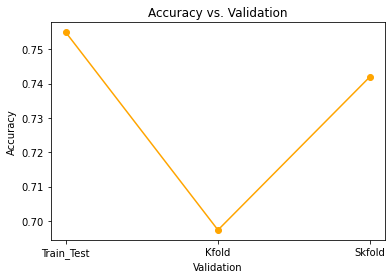

In [645]:
accuracy = [acc, avg_acc_score, avg_acc_score1]
k = ['Train_Test', 'Kfold', 'Skfold']
plt.plot(k, accuracy, color = 'orange', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. Validation')
plt.xlabel('Validation')
plt.ylabel('Accuracy')

In [646]:
X_train.head()

,BMI,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Sex_Female,Sex_Male,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes
0,0.058423,7,5,0,1,1,0,1,0,0,0,1,0,0,1
2,0.199943,9,8,0,1,1,0,0,1,0,0,1,0,0,1
3,0.166336,11,6,1,0,1,0,1,0,1,0,0,0,1,0
4,0.159246,4,8,1,0,1,0,1,0,1,0,0,0,0,1
5,0.232416,11,12,0,1,1,0,1,0,1,0,0,0,1,0


In [647]:
count = X_train.shape[0]

p_s_no = X_train['Smoking_No'].value_counts()[1] / count
p_s_yes = X_train['Smoking_Yes'].value_counts()[1] / count

p_a_no = X_train['AlcoholDrinking_No'].value_counts()[1] / count
p_a_yes = X_train['AlcoholDrinking_Yes'].value_counts()[1] / count

p_se_f = X_train['Sex_Female'].value_counts()[1] / count
p_se_m = X_train['Sex_Male'].value_counts()[1] / count

p_d_no = X_train['Diabetic_No'].value_counts()[1] / count
p_d_nob = X_train['Diabetic_No, borderline diabetes'].value_counts()[1] / count
p_d_yes = X_train['Diabetic_Yes'].value_counts()[1] / count
p_d_yesd = X_train['Diabetic_Yes (during pregnancy)'].value_counts()[1] / count

p_p_no = X_train['PhysicalActivity_No'].value_counts()[1] / count
p_p_yes = X_train['PhysicalActivity_Yes'].value_counts()[1] / count


In [648]:
count = data.shape[0]
p_y = data['HeartDisease'].value_counts()[1] / count
p_n = data['HeartDisease'].value_counts()[0] / count

In [649]:
for i in Y_train:
    if i == 0:
        mean_b_n = data['BMI'].mean()
        std_b_n = data['BMI'].std()
    else:
        mean_b_y = data['BMI'].mean()
        std_b_y = data['BMI'].std()

In [650]:
for i in Y_train:
    if i == 0:
        mean_a_n = data['AgeCategory'].mean()
        std_a_n = data['AgeCategory'].std()
    else:
        mean_a_y = data['AgeCategory'].mean()
        std_a_y = data['AgeCategory'].std()

In [651]:
for i in Y_train:
    if i == 0:
        mean_s_n = data['SleepTime'].mean()
        std_s_n = data['SleepTime'].std()
    else:
        mean_s_y = data['SleepTime'].mean()
        std_s_y = data['SleepTime'].std()

In [652]:
Diabetic_x = [[p_d_no, p_d_nob], [p_d_yes, p_d_yesd]]
BMI_x = [[mean_b_n, std_b_n], [mean_b_y, std_b_y]]
AgeCategory_x = [[mean_a_y, std_a_y], [mean_a_n, std_a_n]]
SleepTime_x = [[mean_s_y, std_s_y], [mean_s_n, std_s_n]]

d = {'HeartDisease': [p_y, p_n], 'Smoking': [p_s_yes, p_s_no], 'AlcoholDrinking': [p_a_yes, p_a_no],
    'Sex': [p_se_f, p_se_m], 'Diabetic': Diabetic_x, 'PhysicalActivity': [p_p_no, p_p_yes], 'BMI': BMI_x, 'AgeCategory': AgeCategory_x, 'SleepTime': SleepTime_x}

df = pd.DataFrame(data=d)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Sex,Diabetic,PhysicalActivity,BMI,AgeCategory,SleepTime
0,0.0986,0.448889,0.063,0.545889,"[0.8274444444444444, 0.024777777777777777]",0.252444,"[0.2290278644356201, 0.09152602383570861]","[6.9893, 3.4805454931221584]","[7.1273, 1.5176709269484232]"
1,0.9014,0.551111,0.937,0.454111,"[0.14066666666666666, 0.0071111111111111115]",0.747556,"[0.2290278644356201, 0.09152602383570861]","[6.9893, 3.4805454931221584]","[7.1273, 1.5176709269484232]"


## Import data

In [3]:
data = pd.read_csv('heart_disease.csv')

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
data = data.drop(['PhysicalHealth', 'MentalHealth', 'SkinCancer', 'KidneyDisease', 'Asthma', 'Stroke', 'Race', 'DiffWalking', 'GenHealth'], axis=1)

data.shape

(10000, 9)

In [5]:
data['AgeCategory'] = data['AgeCategory'].astype('category').cat.codes

In [6]:
cleanup_nums = {'HeartDisease': {'No': 0, 'Yes': 1}, 
                'Smoking': {'Yes': 1, 'No': 0},
               'AlcoholDrinking': {'Yes': 1, 'No': 0},
               'PhysicalActivity': {'Yes': 1, 'No': 0},
               'Sex': {'Female': 1, 'Male': 0}}

data = data.replace(cleanup_nums)

In [7]:
data['Diabetic'] = data['Diabetic'].astype('category').cat.codes

In [8]:
# Normalization

N = len(data)
def normalize(X):
    Max = max(X)
    Min = min(X)
    for i in range(0, N):
        X[i] = (X[i] - Min) / (Max - Min)
        
B = normalize(data['BMI'])

<ipython-input-8-d9565333ed82>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = (X[i] - Min) / (Max - Min)


In [9]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,0,0.058423,1,0,1,7,2,1,5
1,0,0.111458,0,0,1,12,0,1,7
2,0,0.199943,1,0,0,9,2,1,8
3,0,0.166336,0,0,1,11,0,0,6
4,0,0.159246,0,0,1,4,0,1,8


In [10]:
X = data.drop('HeartDisease', axis=1)
Y = data['HeartDisease'] #Target

# First Try
num_of_rows = int(len(data) * 0.8)

X_train = X[:num_of_rows]
X_test = X[num_of_rows:]

Y_train = Y[:num_of_rows]
Y_test = Y[num_of_rows:]
x = Y[num_of_rows:]

## Decision Tree

In [661]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [662]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [663]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [664]:
acc = accuracy_score(pred , Y_test)
acc

0.816

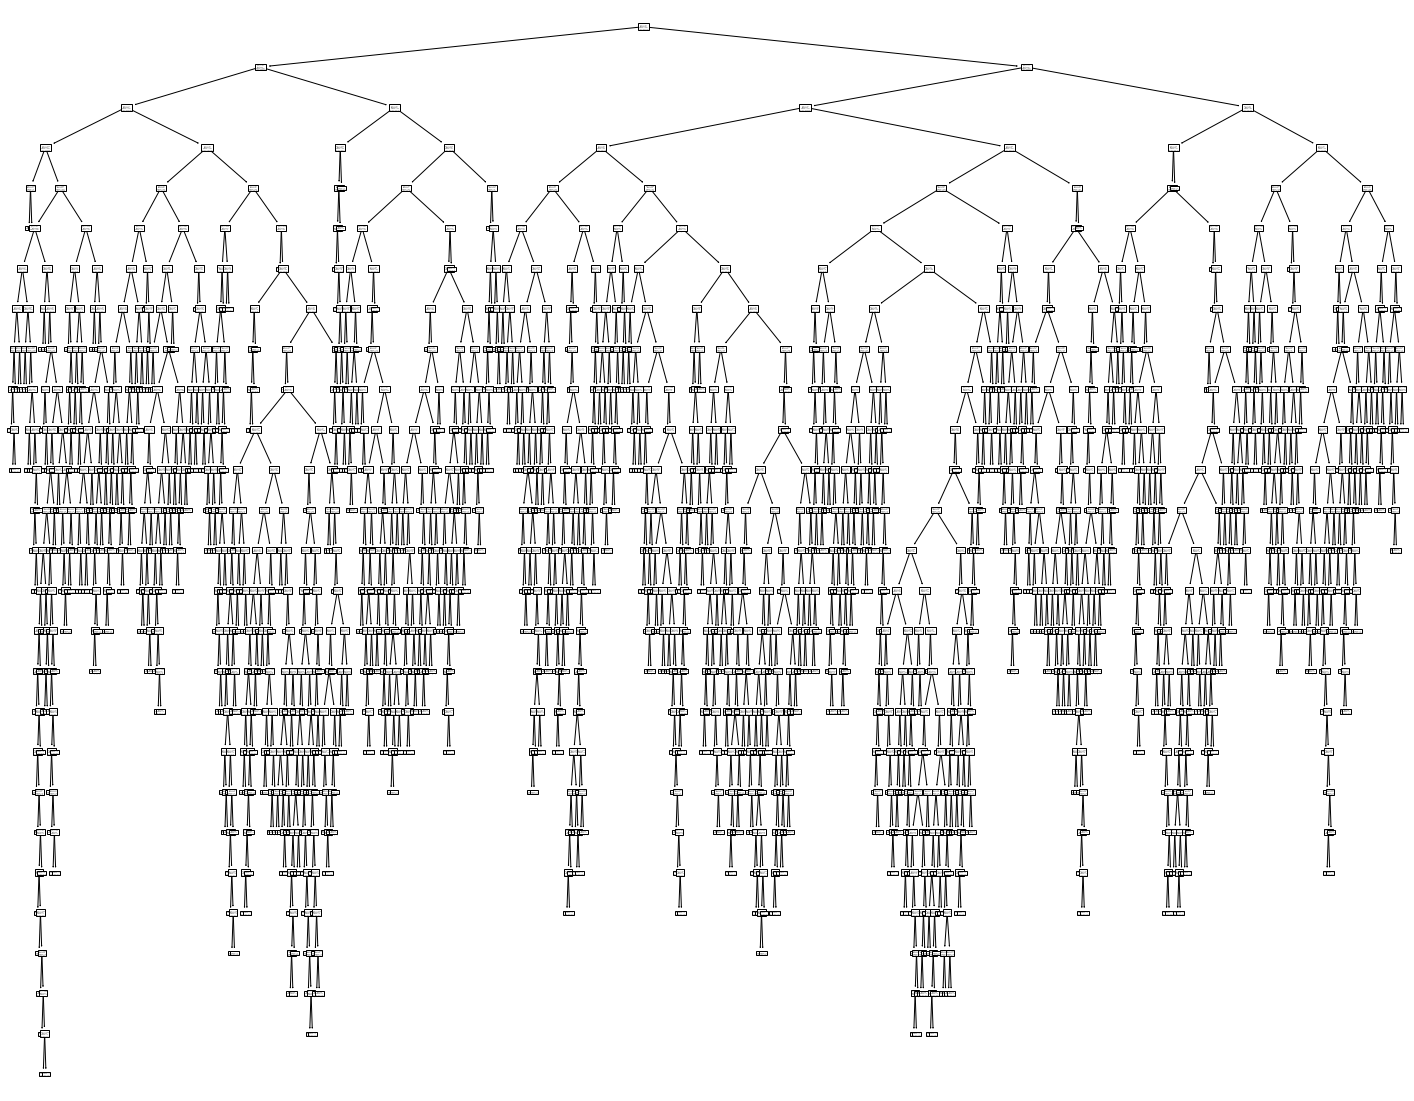

In [665]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf)

In [666]:
# k-fold validation

kf = KFold(n_splits=5, random_state=None)
model = DecisionTreeClassifier()

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train , Y_test = Y[train_index] , Y[test_index]
     
    model.fit(X_train,Y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/5
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.803, 0.856, 0.8535, 0.871, 0.8145]
Avg accuracy : 0.8396000000000001


In [667]:
clf2 = DecisionTreeClassifier(max_depth = 5)
clf2 = clf2.fit(X_train, Y_train)

In [668]:
pred2 = clf2.predict(X_test)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [669]:
acc2 = accuracy_score(pred2 , Y_test)
acc2

0.888

In [670]:
clf3 = DecisionTreeClassifier(max_depth = 10)
clf3 = clf3.fit(X_train, Y_train)

In [671]:
pred3 = clf3.predict(X_test)
pred3

array([0, 0, 0, ..., 1, 0, 0])

In [672]:
acc3 = accuracy_score(pred3 , Y_test)
acc3

0.866

In [673]:
clf4 = DecisionTreeClassifier(max_depth = 15)
clf4 = clf4.fit(X_train, Y_train)

In [674]:
pred4 = clf4.predict(X_test)
pred4

array([0, 0, 0, ..., 1, 0, 0])

In [675]:
acc4 = accuracy_score(pred4 , Y_test)
acc4

0.8375

In [676]:
clf5 = DecisionTreeClassifier(min_samples_leaf = 5)
clf5 = clf5.fit(X_train, Y_train)

In [677]:
pred5 = clf5.predict(X_test)
pred5

array([0, 0, 0, ..., 0, 0, 0])

In [678]:
acc5 = accuracy_score(pred4 , Y_test)
acc5

0.8375

In [679]:
clf6 = DecisionTreeClassifier(min_samples_leaf = 10)
clf6 = clf6.fit(X_train, Y_train)

In [680]:
pred6 = clf6.predict(X_test)
pred6

array([0, 0, 0, ..., 0, 0, 0])

In [681]:
acc6 = accuracy_score(pred6 , Y_test)
acc6

0.871

In [682]:
clf7 = DecisionTreeClassifier(min_samples_leaf = 15)
clf7 = clf7.fit(X_train, Y_train)

In [683]:
pred7 = clf7.predict(X_test)
pred7

array([0, 0, 0, ..., 0, 0, 0])

In [684]:
acc7 = accuracy_score(pred7 , Y_test)
acc7

0.885

Text(0, 0.5, 'Accuracy')

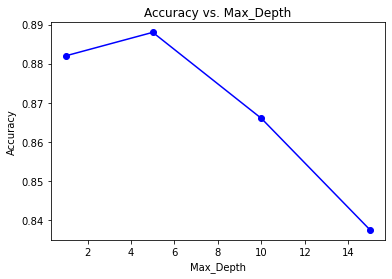

In [685]:
maxd = [1, 5, 10, 15]
accuracy = [acc1,acc2, acc3, acc4]
plt.plot(maxd, accuracy, color = 'blue', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. Max_Depth')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

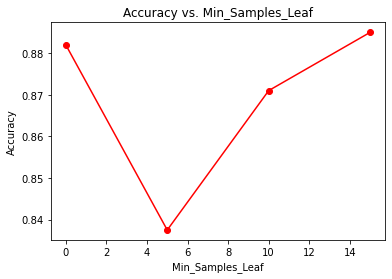

In [686]:
mins = [0, 5, 10, 15]
accuracy = [acc1, acc5,acc6, acc7]
plt.plot(mins, accuracy, color = 'red', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. Min_Samples_Leaf')
plt.xlabel('Min_Samples_Leaf')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

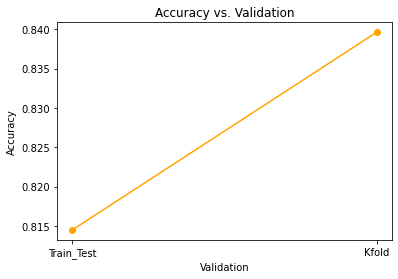

In [687]:
accuracy = [acc, avg_acc_score]
k = ['Train_Test', 'Kfold']
plt.plot(k, accuracy, color = 'orange', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. Validation')
plt.xlabel('Validation')
plt.ylabel('Accuracy')

## Logistic Regrassion

In [688]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
lib_pred = clf.predict(X_test)
lib_pred

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [689]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'hinge',learning_rate='optimal', max_iter=1000).fit(X_train, Y_train)
pred1 = clf.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [690]:
acc1 = accuracy_score(pred1 , Y_test)
loss1 = 1-acc1
loss1

0.11099999999999999

In [691]:
clf = SGDClassifier(loss = 'hinge',learning_rate='optimal', max_iter=10).fit(X_train, Y_train)
pred2 = clf.predict(X_test)
pred2

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [692]:
acc2 = accuracy_score(pred2 , Y_test)
loss2 = 1-acc2
loss2

0.126

In [693]:
clf = SGDClassifier(loss = 'hinge',learning_rate='optimal', max_iter=50).fit(X_train, Y_train)
pred3 = clf.predict(X_test)
pred3

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0, 1, 1, ..., 0, 1, 1])

In [694]:
acc3 = accuracy_score(pred3 , Y_test)
loss3 = 1-acc3
loss3

0.611

In [695]:
clf = SGDClassifier(loss = 'hinge',learning_rate='optimal', max_iter=1050).fit(X_train, Y_train)
pred4 = clf.predict(X_test)
pred4

array([0, 1, 1, ..., 0, 1, 1])

In [696]:
acc4 = accuracy_score(pred4 , Y_test)
loss4 = 1-acc4
loss4

0.649

Text(0, 0.5, 'Loss')

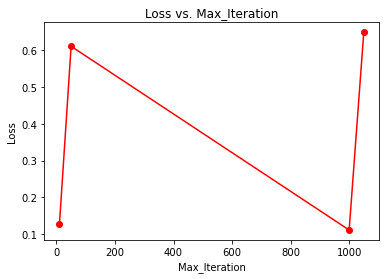

In [697]:
maxs = [10, 50, 1000, 1050]
accuracy = [loss2, loss3,loss1,loss4]
plt.plot(maxs, accuracy, color = 'red', linestyle = 'solid', marker = 'o')
plt.title('Loss vs. Max_Iteration')
plt.xlabel('Max_Iteration')
plt.ylabel('Loss')

In [698]:
clf = SGDClassifier(loss = 'hinge',eta0= 10,learning_rate='adaptive', max_iter=1000).fit(X_train, Y_train)
pred5 = clf.predict(X_test)
pred5

array([0, 0, 0, ..., 0, 0, 0])

In [699]:
acc5 = accuracy_score(pred5 , Y_test)
loss5 = 1-acc5
loss5

0.11150000000000004

In [700]:
clf = SGDClassifier(loss = 'hinge',eta0= 10,learning_rate='invscaling', max_iter=1000).fit(X_train, Y_train)
pred6 = clf.predict(X_test)
pred6

array([0, 0, 0, ..., 0, 0, 0])

In [701]:
acc6 = accuracy_score(pred6 , Y_test)
loss6 = 1-acc6
loss6

0.11150000000000004

In [702]:
clf = SGDClassifier(loss = 'hinge',eta0= 10,learning_rate='constant', max_iter=1000).fit(X_train, Y_train)
pred7 = clf.predict(X_test)
pred7

array([0, 0, 0, ..., 0, 0, 0])

In [703]:
acc7 = accuracy_score(pred7 , Y_test)
loss7 = 1-acc7
loss7

0.11150000000000004

Text(0, 0.5, 'Loss')

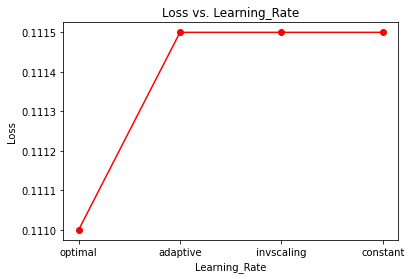

In [704]:
Learning_Rate = ['optimal', 'adaptive', 'invscaling', 'constant']
accuracy = [loss1, loss5, loss6, loss7]
plt.plot(Learning_Rate, accuracy, color = 'red', linestyle = 'solid', marker = 'o')
plt.title('Loss vs. Learning_Rate')
plt.xlabel('Learning_Rate')
plt.ylabel('Loss')

In [705]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
model = SGDClassifier(loss = 'hinge',alpha=0.0001, max_iter=1000)
acc_stratified = []
for train_index, test_index in skf.split(X, Y): 
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train , Y_test = Y[train_index] , Y[test_index] 
    
    model.fit(X_train, Y_train) 
    acc_stratified.append(model.score(X_test, Y_test))
    
avg_acc_score = sum(acc_stratified)/10
print('accuracy of each fold - {}'.format(acc_stratified))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.811, 0.901, 0.902, 0.902, 0.888, 0.903, 0.902, 0.901, 0.901, 0.901]
Avg accuracy : 0.8912000000000001


Text(0, 0.5, 'Accuracy')

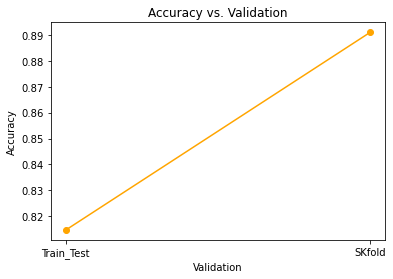

In [706]:
accuracy = [acc, avg_acc_score]
k = ['Train_Test', 'SKfold']
plt.plot(k, accuracy, color = 'orange', linestyle = 'solid', marker = 'o')
plt.title('Accuracy vs. Validation')
plt.xlabel('Validation')
plt.ylabel('Accuracy')

## K-Means

In [707]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [708]:
kmeans.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [709]:
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [710]:
kmeans.cluster_centers_

array([[0.23729323, 0.40494719, 0.07893274, 0.50750417, 3.31295164,
        0.18037799, 0.79766537, 6.92301278],
       [0.22343576, 0.47815624, 0.052388  , 0.57145502, 9.43224732,
        0.425398  , 0.71417993, 7.24861163]])

In [711]:
X_train['kmean'] = kmeans.labels_

<ipython-input-711-c962752fda91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['kmean'] = kmeans.labels_


In [712]:
X_train['kmean'].value_counts()

1    5402
0    3598
Name: kmean, dtype: int64

## One-R

In [11]:
data = data.sort_values('BMI')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
1688,1,0.000000,1,0,0,6,0,0,12
5037,0,0.003829,1,1,0,0,0,1,5
8471,0,0.017584,1,0,1,11,0,0,8
6247,0,0.019711,0,1,0,10,0,0,8
1844,0,0.026517,0,0,1,4,0,0,8
...,...,...,...,...,...,...,...,...,...
2359,0,0.766875,1,0,1,10,0,0,9
9358,1,0.897476,1,1,0,2,2,0,15
561,0,0.898185,0,0,1,6,0,1,8
9088,0,0.996597,0,0,1,6,2,1,10


In [12]:
data = data.reset_index(drop=True)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,1,0.000000,1,0,0,6,0,0,12
1,0,0.003829,1,1,0,0,0,1,5
2,0,0.017584,1,0,1,11,0,0,8
3,0,0.019711,0,1,0,10,0,0,8
4,0,0.026517,0,0,1,4,0,0,8
...,...,...,...,...,...,...,...,...,...
9995,0,0.766875,1,0,1,10,0,0,9
9996,1,0.897476,1,1,0,2,2,0,15
9997,0,0.898185,0,0,1,6,0,1,8
9998,0,0.996597,0,0,1,6,2,1,10


In [22]:
c= []
flag = 'flag'
for i in range(0, len(data)-1):
    if(data['BMI'][i] == data['BMI'][i+1] or data['HeartDisease'][i] == data['HeartDisease'][i+1]):
        c.append(data['HeartDisease'][i])
    else:
        c.append(data['HeartDisease'][i])
        c.append(flag)

c

[1,
 'flag',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'flag',
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 'flag',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 'flag',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 'flag',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'flag',
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'flag',
 1,
 'flag',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 'flag',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 'flag',
 0,
 0,
 'flag',
 1,
 'flag',
 0,
 0,
 0,
 0,
 'flag',
 1,
 'flag',
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0

In [64]:
p1 = []
p2 = []
miin = 500
for i in range(0, len(c)):
    if(c[i] == flag):
        x = max(c[0:i].count(0), c[0:i].count(1))
        if(x >= miin):
            p1.append(c[0:i])
            p2.append(c[i:])
            
        else:
            continue
    else:
        continue   


In [68]:
if p1[0].count(0) >= p1[0].count(1):
    p_b1 = p1[0].count(0) / len(p1[0])
    print('No')
else:
    p_b1 = p1[0].count(1) / len(p1[0])
    print('Yes')
    
p_b1

No


0.9015668943350743

In [70]:
if p2[0].count(1) > p2[0].count(0):
    p_b2 = p2[0].count(0) / len(p2[0])
    print('No')
else:
    p_b2 = p2[0].count(1) / len(p2[0])
    print('Yes')
    
p_b2

Yes


0.15555555555555556

In [35]:
data = data.sort_values('AgeCategory')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
591,0,0.113868,0,0,1,0,0,1,8
7854,0,0.289847,0,0,1,0,0,1,5
2561,0,0.167612,0,0,1,0,0,1,7
852,0,0.124787,0,0,1,0,0,0,7
3474,0,0.185337,0,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...
609,1,0.114436,1,0,1,12,2,1,8
611,0,0.115145,1,0,1,12,0,1,9
6313,1,0.241775,0,0,0,12,2,0,6
2441,0,0.165201,1,0,1,12,0,1,8


In [36]:
data = data.reset_index(drop=True)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,0,0.113868,0,0,1,0,0,1,8
1,0,0.289847,0,0,1,0,0,1,5
2,0,0.167612,0,0,1,0,0,1,7
3,0,0.124787,0,0,1,0,0,0,7
4,0,0.185337,0,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...
9995,1,0.114436,1,0,1,12,2,1,8
9996,0,0.115145,1,0,1,12,0,1,9
9997,1,0.241775,0,0,0,12,2,0,6
9998,0,0.165201,1,0,1,12,0,1,8


In [37]:
c= []
flag = 'flag'
for i in range(0, len(data)-1):
    if(data['AgeCategory'][i] == data['AgeCategory'][i+1] or data['HeartDisease'][i] == data['HeartDisease'][i+1]):
        c.append(data['HeartDisease'][i])
    else:
        c.append(data['HeartDisease'][i])
        c.append(flag)

c

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [61]:
p1 = []
p2 = []
miin = 500
for i in range(0, len(c)):
    if(c[i] == flag):
        x = max(c[0:i].count(0), c[0:i].count(1))
        if(x >= miin):
            p1.append(c[0:i])
            p2.append(c[i:])
            
        else:
            continue
    else:
        continue   


In [62]:
if p1[0].count(0) >= p1[0].count(1):
    p_b1 = p1[0].count(0) / len(p1[0])
else:
    p_b1 = p1[0].count(1) / len(p1[0])
    
p_b1

0.9015668943350743

In [63]:
if p2[0].count(0) > p2[0].count(1):
    p_b2 = p2[0].count(0) / len(p2[0])
else:
    p_b2 = p2[0].count(1) / len(p2[0])
    
p_b2

0.8222222222222222

In [43]:
data = data.sort_values('SleepTime')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
7695,0,0.217385,0,0,1,10,0,1,1
8118,0,0.085508,0,0,1,10,0,1,1
369,0,0.250000,0,0,1,0,0,1,1
2352,0,0.455899,1,0,1,4,0,1,1
8028,0,0.120533,0,0,1,10,0,1,1
...,...,...,...,...,...,...,...,...,...
4358,0,0.337209,0,0,0,7,0,0,18
9970,0,0.163783,0,0,1,12,0,1,18
6462,0,0.188883,1,0,0,9,0,1,20
9202,1,0.177538,1,1,1,12,0,1,20


In [44]:
data = data.reset_index(drop=True)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,0,0.217385,0,0,1,10,0,1,1
1,0,0.085508,0,0,1,10,0,1,1
2,0,0.250000,0,0,1,0,0,1,1
3,0,0.455899,1,0,1,4,0,1,1
4,0,0.120533,0,0,1,10,0,1,1
...,...,...,...,...,...,...,...,...,...
9995,0,0.337209,0,0,0,7,0,0,18
9996,0,0.163783,0,0,1,12,0,1,18
9997,0,0.188883,1,0,0,9,0,1,20
9998,1,0.177538,1,1,1,12,0,1,20


In [45]:
c= []
flag = 'flag'
for i in range(0, len(data)-1):
    if(data['SleepTime'][i] == data['SleepTime'][i+1] or data['HeartDisease'][i] == data['HeartDisease'][i+1]):
        c.append(data['HeartDisease'][i])
    else:
        c.append(data['HeartDisease'][i])
        c.append(flag)

c

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 'flag',
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,

In [58]:
p1 = []
p2 = []
miin = 500
for i in range(0, len(c)):
    if(c[i] == flag):
        x = max(c[0:i].count(0), c[0:i].count(1))
        if(x >= miin):
            p1.append(c[0:i])
            p2.append(c[i:])
            
        else:
            continue
    else:
        continue   


In [59]:
if p1[0].count(0) >= p1[0].count(1):
    p_b1 = p1[0].count(0) / len(p1[0])
else:
    p_b1 = p1[0].count(1) / len(p1[0])
    
p_b1

0.9015668943350743

In [60]:
if p2[0].count(0) > p2[0].count(1):
    p_b2 = p2[0].count(0) / len(p2[0])
else:
    p_b2 = p2[0].count(1) / len(p2[0])
    
p_b2

0.8222222222222222